In [ ]:
import os
import pandas as pd
import numpy as np

current = os.getcwd()
df = pd.read_csv('iris-dataset.csv')

binary_data = df[df['species'].isin(['setosa', 'versicolor'])]

正解率: 100.00%
間違えた数: 0 / 100


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12497 (\N{KATAKANA LETTER PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPytho

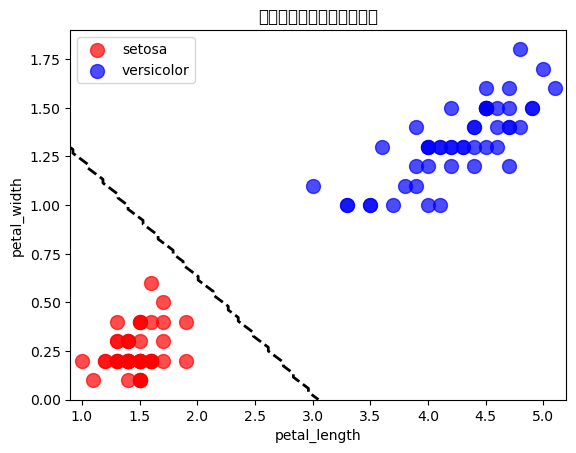

In [ ]:
# 予測のテスト

predictions = perceptron.predict(X)

# 正解率を計算
accuracy = np.mean(predictions == y)
print(f"正解率: {accuracy:.2%}")

# 何個間違えたか
errors = np.sum(predictions != y)
print(f"間違えた数: {errors} / {len(y)}")


setosa = binary_data[binary_data['species'] == 'setosa']
versicolor = binary_data[binary_data['species'] == 'versicolor']

plt.scatter(setosa['petal_length'], setosa['petal_width'], 
           label='setosa', alpha=0.7, color='red', s=100)
plt.scatter(versicolor['petal_length'], versicolor['petal_width'], 
           label='versicolor', alpha=0.7, color='blue', s=100)

# 決定境界を描画
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(mesh_points)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--', linewidths=2)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.title('パーセプトロンの決定境界')
plt.show()

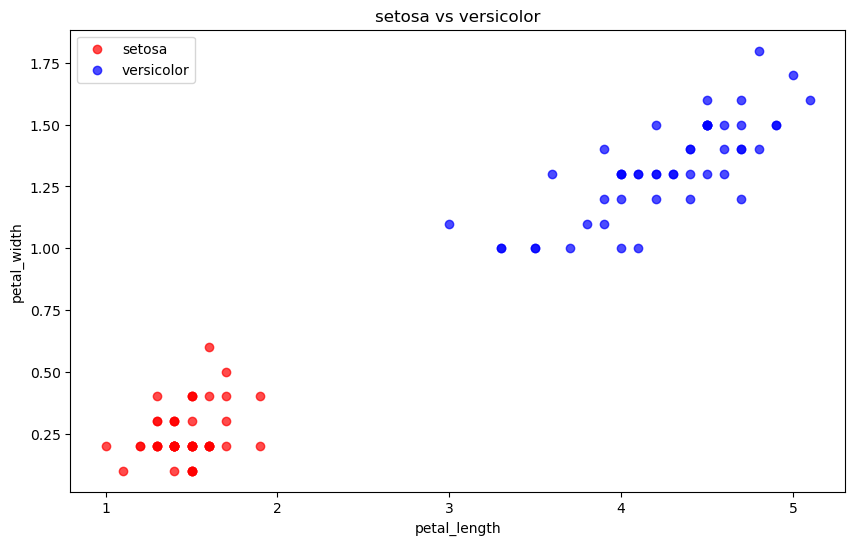

In [ ]:
import matplotlib.pyplot as plt

# データを種類別に分ける
setosa = binary_data[binary_data['species'] == 'setosa']
versicolor = binary_data[binary_data['species'] == 'versicolor']

# petal_length vs petal_widthで散布図
plt.figure(figsize=(10, 6))
plt.scatter(setosa['petal_length'], setosa['petal_width'], 
           label='setosa', alpha=0.7, color='red')
plt.scatter(versicolor['petal_length'], versicolor['petal_width'], 
           label='versicolor', alpha=0.7, color='blue')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.title('setosa vs versicolor')
plt.show()

In [ ]:
x = binary_data[['petal_length', 'petal_width']].values
y = (binary_data['species'] == 'versicolor').astype(int)

print("\n最初の5個のデータ:")
for i in range(5):
    print(f"petal_length: {X[i,0]:.2f}, petal_width: {X[i,1]:.2f}")




最初の5個のデータ:
petal_length: 1.40, petal_width: 0.20
petal_length: 1.40, petal_width: 0.20
petal_length: 1.30, petal_width: 0.20
petal_length: 1.50, petal_width: 0.20
petal_length: 1.40, petal_width: 0.20


In [ ]:
import numpy as np
class Perceptron:
    def __init__(self, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None

    def fit(self, X, y, epochs=100):
        n_features = X.shape[1]  # 特徴量の数（今回は2）
        self.weights = np.random.normal(0, 0.1, n_features)  # 小さな乱数で初期化
        self.bias = 0

        for epoch in range(epochs):
            for i in range(len(X)):
                x_i = X[i]
                y_i = y[i]

                linear_output = np.dot(x_i, self.weights) + self.bias
                prediction = 1 if linear_output >= 0 else 0

                # 予測が間違っていたら重みを更新
                if prediction != y_i:
                    error = y_i - prediction  # +1 or -1
                    self.weights += self.learning_rate * error * x_i
                    self.bias += self.learning_rate * error
        print(f"学習完了！最終的な重み: {self.weights}, バイアス: {self.bias}")
                    

    def predict(self, X):
        pass

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        predictions = np.where(linear_output >= 0, 1, 0)

        return predictions


# インスタンス作成
perceptron = Perceptron()

# 仮の重みとバイアスを設定
perceptron.weights = np.array([1.0, -2.0])  # 適当な値
perceptron.bias = 0.5

# テスト用データ
test_X = np.array([[1.0, 0.5], [2.0, 1.0]])
print("予測結果:", perceptron.predict(test_X))

perceptron = Perceptron(learning_rate=0.1)
perceptron.fit(X, y, epochs=20)

予測結果: [1 1]
学習完了！最終的な重み: [0.0985432  0.16369496], バイアス: -0.30000000000000004


正解率: 100.00%
間違えた数: 0 / 100


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12497 (\N{KATAKANA LETTER PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPytho

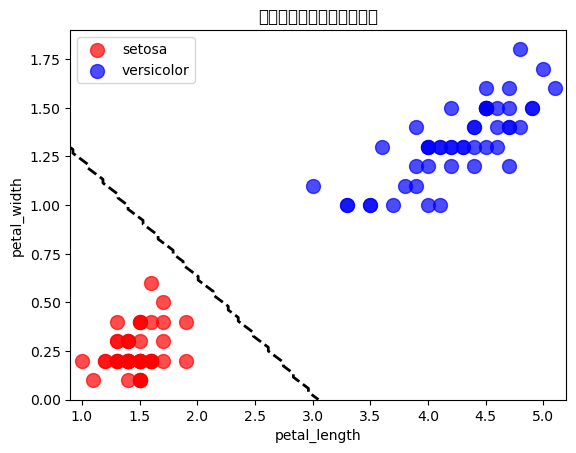

In [ ]:
# 予測のテスト

predictions = perceptron.predict(X)

# 正解率を計算
accuracy = np.mean(predictions == y)
print(f"正解率: {accuracy:.2%}")

# 何個間違えたか
errors = np.sum(predictions != y)
print(f"間違えた数: {errors} / {len(y)}")


setosa = binary_data[binary_data['species'] == 'setosa']
versicolor = binary_data[binary_data['species'] == 'versicolor']

plt.scatter(setosa['petal_length'], setosa['petal_width'], 
           label='setosa', alpha=0.7, color='red', s=100)
plt.scatter(versicolor['petal_length'], versicolor['petal_width'], 
           label='versicolor', alpha=0.7, color='blue', s=100)

# 決定境界を描画
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(mesh_points)
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0.5], colors='black', linestyles='--', linewidths=2)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()
plt.title('パーセプトロンの決定境界')
plt.show()